In [4]:
import numpy as np
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle


import powerlaw
print(powerlaw.__version__)


1.5


In [73]:
reconLOBs = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB'
powerLawFiguresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures/PowerLaw'
powerLawResults = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/PowerLawResults'
symbols = sorted(os.listdir(reconLOBs))
symbolFolders = [os.path.join(reconLOBs, symbol) for symbol in symbols]

def extract_obi_avg(dataframes_dict):
    """
    Extracts 'OBI_avg' column from each DataFrame in the provided dictionary
    and combines them into a new DataFrame.

    Parameters:
    dataframes_dict (dict): A dictionary of pandas DataFrames.

    Returns:
    pandas.DataFrame: A new DataFrame containing all 'OBI_avg' columns.
    """
    obi_avg_columns = []

    for df_name, df in dataframes_dict.items():
        if 'OBI_avg' in df.columns:
            # Extract the 'OBI_avg' column and add a reference to the original DataFrame if needed
            obi_avg_col = df['OBI_avg'].rename(f'{df_name}_OBI_avg')
            obi_avg_columns.append(obi_avg_col)

    # Combine all the extracted columns into a new DataFrame
    combined_df = pd.concat(obi_avg_columns, axis=1)

    return combined_df

directory ='OrderBookImbalance'
path = os.path.join(reconLOBs,directory,)

pathFiles = os.listdir(path)

obiFiles = [f for f in pathFiles if str('calendar.pkl') in f]
len(obiFiles)
# Set plot style
plt.style.use({'xtick.color': '#323034', 
               'ytick.color': '#323034',
               'text.color': '#323034',
               'lines.markeredgecolor': 'black',
               'patch.facecolor': 'bc80bd',
               'patch.force_edgecolor': True,
               'patch.linewidth': 0.8,
               #... rest of style
               'legend.frameon': True,
               'legend.fontsize': 10,
               'axes.labelpad': 3,
               'figure.dpi': 300
               })

idx = 12

dicts_df = pd.read_pickle(os.path.join(path, obiFiles[[idx]]))
dicts_df
median = dicts_df.median(axis=1)
symbol = obiFiles[idx].split("_")[0]
data= median
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
title = str(symbol)+'_OBI_powerlaw_plot.png'
plt.savefig(os.path.join(figuresLocation, title_), dpi=300)
# Plot PDF
fig_pdf = plt.figure()
ax = fig_pdf.add_subplot(1,1,1) 
fit.plot_pdf(ax=ax, color='b', linewidth=2)
fit.power_law.plot_pdf(ax=ax, color='b', linestyle='--', )
plt.tight_layout()
pdf_title = symbol + '_pdf.png' 
fig_pdf.savefig(os.path.join(powerLawFiguresLocation, pdf_title), dpi=300)

# Plot CCDF
fig_ccdf = plt.figure()
ax = fig_ccdf.add_subplot(1,1,1)
fit.plot_ccdf(ax=ax, color='r', linewidth=2)
fit.power_law.plot_ccdf(ax=ax, color='r', linestyle='--')
plt.tight_layout()
ccdf_title = symbol + '_ccdf.png'
fig_ccdf.savefig(os.path.join(powerLawFiguresLocation, ccdf_title), dpi=300) 

# Plot original  
fig_original = plt.figure() 
ax = fig_original.add_subplot(1,1,1)
# plot data
plt.tight_layout()
original_title = symbol + '_original.png'
fig_original.savefig(os.path.join(powerLawFiguresLocation, original_title), dpi=300)
# Save results
results = {'alpha': fit.power_law.alpha, # best minimal fit for powerlaw fit
           'sigma': fit.power_law.sigma,
           'xmin': fit.xmin,
           'xmax': fit.xmax,
           'xmin_distance': fit.xmin_distance,
           'alpha_std_err': fit.power_law.sigma,
           'distribution': fit.power_law.name,
           'D': fit.D,
           'n': fit.n,
           x, y = fit.cdf()
           'n_tail': fit.n_tail,
           'loglikelihood': fit.power_law.loglikelihood}


# Pickle the fit
fitted_model_title = os.path.join(powerLawResults, 'powerLaw'+'_'+str(symbol)+'fitted_model.pkl')
with open(fitted_model_title, 'wb') as f:
    pickle.dump(fit, f)


In [67]:
# Set plot style
plt.style.use({'xtick.color': '#323034', 
               'ytick.color': '#323034',
               'text.color': '#323034',
               'lines.markeredgecolor': 'black',
               'patch.facecolor': 'bc80bd',
               'patch.force_edgecolor': True,
               'patch.linewidth': 0.8,
               #... rest of style
               'legend.frameon': True,
               'legend.fontsize': 10,
               'axes.labelpad': 3,
               'figure.dpi': 300
               })

idx = 12

dicts_df = pd.read_pickle(os.path.join(path, obiFiles[[idx]]))
dicts_df
median = dicts_df.median(axis=1)
symbol = obiFiles[idx].split("_")[0]
data= median
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
title = str(symbol)+'_OBI_powerlaw_plot.png'
plt.savefig(os.path.join(figuresLocation, title_), dpi=300)
# Plot PDF
fig_pdf = plt.figure()
ax = fig_pdf.add_subplot(1,1,1) 
fit.plot_pdf(ax=ax, color='b', linewidth=2)
fit.power_law.plot_pdf(ax=ax, color='b', linestyle='--', )
plt.tight_layout()
pdf_title = symbol + '_pdf.png' 
fig_pdf.savefig(os.path.join(powerLawFiguresLocation, pdf_title), dpi=300)

# Plot CCDF
fig_ccdf = plt.figure()
ax = fig_ccdf.add_subplot(1,1,1)
fit.plot_ccdf(ax=ax, color='r', linewidth=2)
fit.power_law.plot_ccdf(ax=ax, color='r', linestyle='--')
plt.tight_layout()
ccdf_title = symbol + '_ccdf.png'
fig_ccdf.savefig(os.path.join(powerLawFiguresLocation, ccdf_title), dpi=300) 

# Plot original  
fig_original = plt.figure() 
ax = fig_original.add_subplot(1,1,1)
# plot data
plt.tight_layout()
original_title = symbol + '_original.png'
fig_original.savefig(os.path.join(powerLawFiguresLocation, original_title), dpi=300)
# Save results
results = {'alpha': fit.power_law.alpha, # best minimal fit for powerlaw fit
           'sigma': fit.power_law.sigma,
           'xmin': fit.xmin,
           'xmax': fit.xmax,
           'xmin_distance': fit.xmin_distance,
           'alpha_std_err': fit.power_law.sigma,
           'distribution': fit.power_law.name,
           'D': fit.D,
           'n': fit.n,
           x, y = fit.cdf()
           'n_tail': fit.n_tail,
           'loglikelihood': fit.power_law.loglikelihood}


# Pickle the fit
fitted_model_title = os.path.join(powerLawResults, 'powerLaw'+'_'+str(symbol)+'fitted_model.pkl')
with open(fitted_model_title, 'wb') as f:
    pickle.dump(fit, f)


In [70]:
import matplotlib.pyplot as plt



'UST5y'

Values less than or equal to 0 in data. Throwing out 0 or negative values
/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/powerlaw.py:1156: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))


Calculating best minimal value for power law fit


/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/powerlaw.py:1156: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))


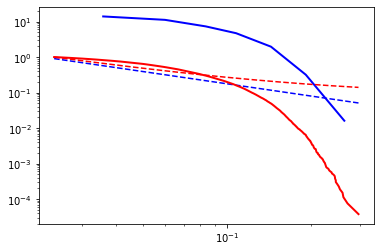

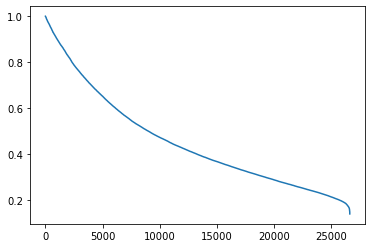

In [20]:
plt.plot(fit.power_law.ccdf())

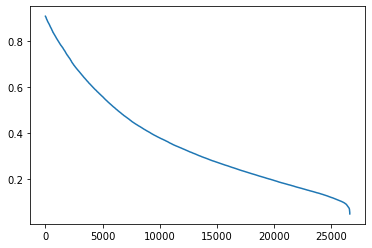

In [23]:
plt.plot(fit.power_law.pdf())

In [24]:
fit.

array([0.00000000e+00, 3.75135987e-05, 7.50271974e-05, ...,
       9.99887459e-01, 9.99924973e-01, 9.99962486e-01])

In [26]:
print(results)

{'alpha': 1.1450190813846373, 'sigma': 0.0008882178849827406, 'xmin': 0.02390438247011952, 'xmax': None, 'xmin_distance': 'D', 'alpha_std_err': 0.0008882178849827406, 'distribution': 'power_law', 'D': 0.17220346940261722, 'n': 26657.0, 'n_tail': 26657.0, 'loglikelihood': -31587.40021500757}


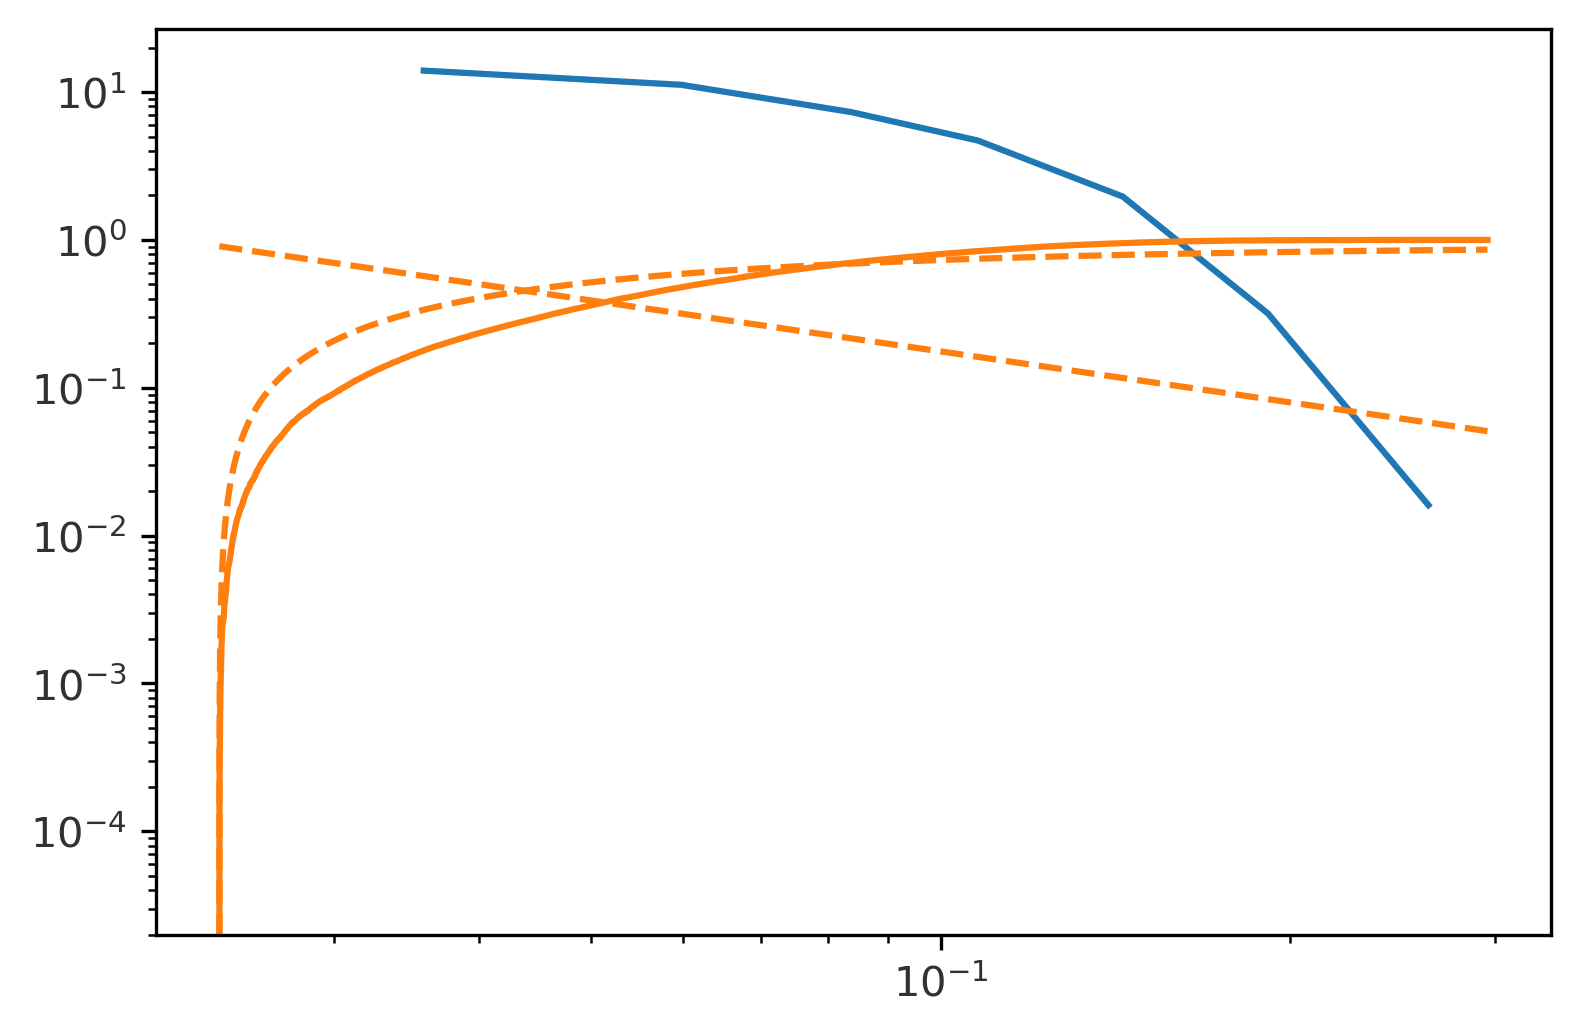

In [29]:


# # Fit data 
# fit = powerlaw.Fit(data)

# Plot
fig = fit.plot_pdf()
fit.power_law.plot_pdf(ax=fig, linestyle='--', color='C1') 

fig = fit.plot_cdf()
fit.power_law.plot_cdf(ax=fig, linestyle='--', color='C1')

# Set figure properties
# fig.set_size_inches(4, 4)
# fig.tight_layout()

# plt.savefig('powerlaw_plot.png', dpi=300)

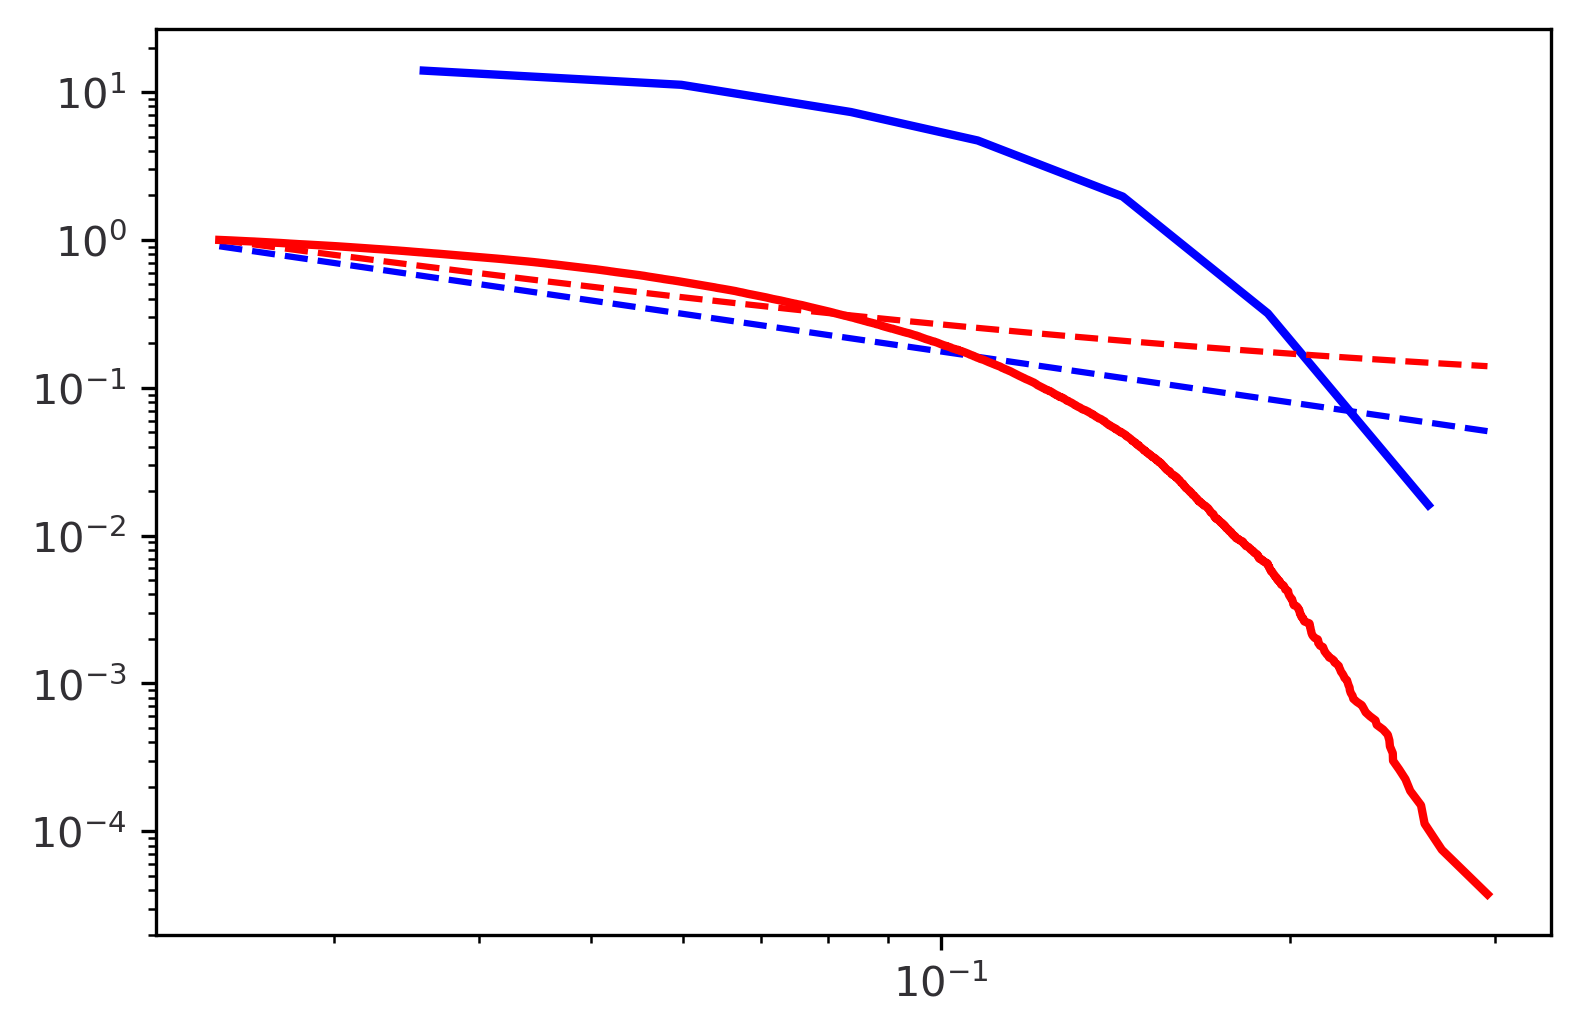

In [30]:
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)

In [72]:
bin_edges, probability = fit.pdf()